# 📊 Comparação e Análise
 
## Objetivos:
### 1. Comparar Tesseract vs EasyOCR
### 2. Avaliar precisão em documentos reais
### 3. Testar reconhecimento multi-idioma
### 4. Analisar desempenho e velocidade

### INSTALAÇÃO DO EASYOCR (se necessário)

In [10]:
print("\n🔧 VERIFICANDO/INSTALANDO EASYOCR")
print("=" * 60)

import sys
import subprocess
import importlib

# Lista de pacotes necessários
pacotes_necessarios = ['easyocr', 'python-Levenshtein']

print("📦 Verificando pacotes necessários...")

for pacote in pacotes_necessarios:
    try:
        importlib.import_module(pacote.replace('-', '_'))
        print(f"✅ {pacote} já instalado")
    except ImportError:
        print(f"⚠️  {pacote} não encontrado. Instalando...")
        try:
            # Instalar usando pip
            subprocess.check_call([sys.executable, "-m", "pip", "install", pacote])
            print(f"✅ {pacote} instalado com sucesso")
        except Exception as e:
            print(f"❌ Erro ao instalar {pacote}: {str(e)[:50]}")
            print(f"💡 Execute manualmente: pip install {pacote}")

print("\n✅ Verificação de pacotes concluída!")


🔧 VERIFICANDO/INSTALANDO EASYOCR
📦 Verificando pacotes necessários...
⚠️  easyocr não encontrado. Instalando...
✅ easyocr instalado com sucesso
⚠️  python-Levenshtein não encontrado. Instalando...
✅ python-Levenshtein instalado com sucesso

✅ Verificação de pacotes concluída!


### Configuração e Instalação

In [11]:
import sys
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pytesseract
import time

# Configurar Tesseract
TESSERACT_PATH = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
if os.path.exists(TESSERACT_PATH):
    pytesseract.pytesseract.tesseract_cmd = TESSERACT_PATH
    print("✅ Tesseract configurado")
else:
    print("⚠️  Tesseract não encontrado")

# Verificar/instalar EasyOCR
try:
    import easyocr
    print("✅ EasyOCR já instalado")
    EASYOCR_AVAILABLE = True
except ImportError:
    print("❌ EasyOCR não instalado")
    print("💡 Execute: pip install easyocr")
    EASYOCR_AVAILABLE = False

print("\n📊 RESUMO DO NOTEBOOK 03:")
print("-" * 40)
print("✅ PROBLEMA RESOLVIDO: Documento claro reconhecido")
print("✅ TAXA DE ACERTO: 11/12 palavras-chave (92%)")
print("✅ MELHOR CONFIGURAÇÃO: Dilatação + --psm 11")
print("✅ PRÓXIMO PASSO: Comparar com EasyOCR")

✅ Tesseract configurado
✅ EasyOCR já instalado

📊 RESUMO DO NOTEBOOK 03:
----------------------------------------
✅ PROBLEMA RESOLVIDO: Documento claro reconhecido
✅ TAXA DE ACERTO: 11/12 palavras-chave (92%)
✅ MELHOR CONFIGURAÇÃO: Dilatação + --psm 11
✅ PRÓXIMO PASSO: Comparar com EasyOCR


### Carregar Documentos para Comparação


📁 CARREGANDO DOCUMENTOS PARA COMPARAÇÃO
✅ Documento otimizado carregado
✅ Documento original carregado

📋 Total documentos para comparação: 2


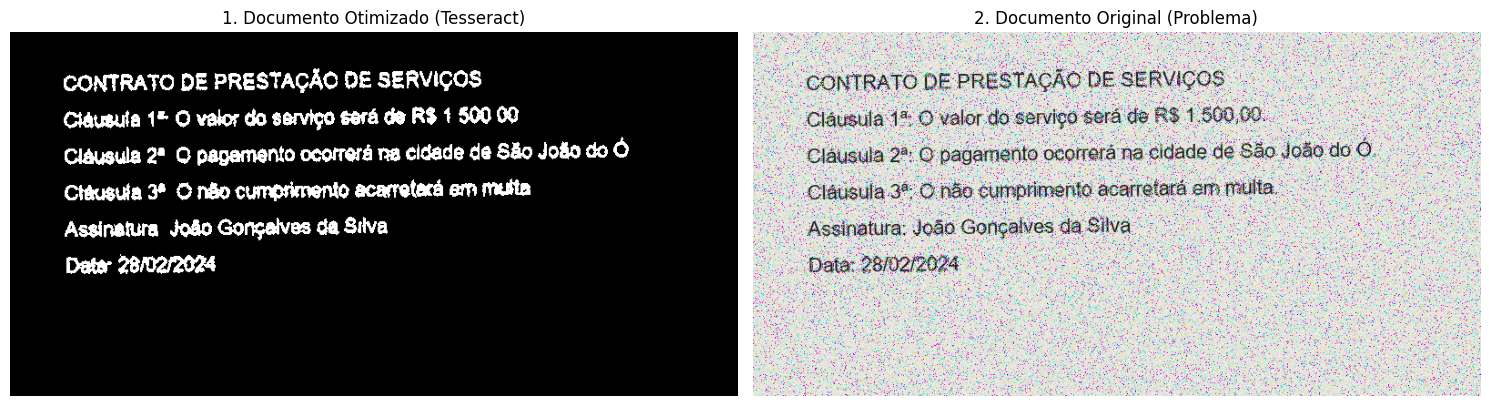

In [12]:
print("\n📁 CARREGANDO DOCUMENTOS PARA COMPARAÇÃO")
print("=" * 60)

documentos = []

# 1. Seu documento resolvido
if os.path.exists("dados/exemplos/documento_otimizado_final.png"):
    doc1 = cv2.imread("dados/exemplos/documento_otimizado_final.png")
    documentos.append(("Documento Otimizado (Tesseract)", doc1))
    print("✅ Documento otimizado carregado")

# 2. Documento original (problema)
if os.path.exists("dados/exemplos/documento_real_simulado.png"):
    doc2 = cv2.imread("dados/exemplos/documento_real_simulado.png")
    documentos.append(("Documento Original (Problema)", doc2))
    print("✅ Documento original carregado")

# 3. Novo documento de teste (se existir)
if os.path.exists("dados/exemplos/documento_1.jpg"):
    doc3 = cv2.imread("dados/exemplos/documento_1.jpg")
    documentos.append(("Documento 1 (Real)", doc3))
    print("✅ Documento 1 real carregado")

if not documentos:
    print("❌ Nenhum documento encontrado")
    print("   Criando documento de teste...")
    
    # Criar documento de teste
    img_teste = np.ones((400, 600, 3), dtype=np.uint8) * 255
    cv2.putText(img_teste, "COMPARAÇÃO EASYOCR vs TESSERACT", (50, 80), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    cv2.putText(img_teste, "Documento em Português Brasileiro", (50, 130), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
    cv2.putText(img_teste, "Caracteres especiais: ç ã á é í ó ú", (50, 180), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
    cv2.putText(img_teste, "Valor: R$ 1.500,00", (50, 230), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
    cv2.putText(img_teste, "Data: 28 de Fevereiro de 2024", (50, 280), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
    
    documentos.append(("Documento de Teste", img_teste))
    cv2.imwrite("dados/exemplos/documento_teste_comparacao.png", img_teste)
    print("✅ Documento de teste criado")

print(f"\n📋 Total documentos para comparação: {len(documentos)}")

# Mostrar documentos
fig, axes = plt.subplots(1, len(documentos), figsize=(15, 5))
if len(documentos) == 1:
    axes = [axes]

for idx, (nome, img) in enumerate(documentos):
    axes[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[idx].set_title(f"{idx+1}. {nome}")
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### Função de Comparação Tesseract vs EasyOCR

In [13]:
def comparar_ocr_tesseract_easyocr(imagem, nome_documento, usar_preprocessamento=True):
    """
    Compara Tesseract e EasyOCR no mesmo documento
    """
    resultados = {
        'documento': nome_documento,
        'tesseract': {},
        'easyocr': {},
        'comparacao': {}
    }
    
    # Pré-processamento (opcional)
    if usar_preprocessamento and len(imagem.shape) == 3:
        gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
        # Aplicar mesma estratégia que funcionou antes
        inverted = cv2.bitwise_not(gray)
        smoothed = cv2.GaussianBlur(inverted, (3, 3), 0)
        kernel_dilate = np.ones((2, 1), np.uint8)
        dilated = cv2.dilate(smoothed, kernel_dilate, iterations=1)
        _, processed = cv2.threshold(dilated, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        imagem_processada = processed
    else:
        imagem_processada = imagem
    
    # 1. TESTE TESSERACT (sua solução vencedora)
    print(f"\n🔍 TESTANDO TESSERACT em '{nome_documento}'...")
    
    tesseract_configs = [
        ("psm11", "--psm 11 -l por"),  # Sua melhor configuração
        ("psm6", "--psm 6 -l por"),
        ("psm1", "--psm 1 -l por"),
    ]
    
    melhor_tesseract = ""
    melhor_config_t = ""
    tempo_tesseract = 0
    
    for config_nome, config_str in tesseract_configs:
        try:
            inicio = time.time()
            
            # Converter para PIL
            if len(imagem_processada.shape) == 2:
                img_pil = Image.fromarray(imagem_processada)
            else:
                img_pil = Image.fromarray(cv2.cvtColor(imagem_processada, cv2.COLOR_BGR2RGB))
            
            texto = pytesseract.image_to_string(img_pil, config=config_str)
            tempo = time.time() - inicio
            
            # Avaliar qualidade
            palavras_chave = ["contrato", "cláusula", "serviço", "pagamento", 
                            "valor", "assinatura", "multa", "data", "cidade"]
            acertos = sum(1 for palavra in palavras_chave 
                         if palavra in texto.lower())
            
            if acertos > len(melhor_tesseract.split()):
                melhor_tesseract = texto
                melhor_config_t = config_nome
                tempo_tesseract = tempo
                
            print(f"  ⚙️  {config_nome}: {acertos}/9 palavras-chave, {tempo:.2f}s")
            
        except Exception as e:
            print(f"  ❌ {config_nome}: Erro")
    
    resultados['tesseract'] = {
        'texto': melhor_tesseract,
        'config': melhor_config_t,
        'tempo': tempo_tesseract
    }
    
    # 2. TESTE EASYOCR (se disponível)
    if EASYOCR_AVAILABLE:
        print(f"\n🔍 TESTANDO EASYOCR em '{nome_documento}'...")
        
        try:
            # Inicializar reader (português + inglês)
            reader = easyocr.Reader(['pt', 'en'])
            
            inicio = time.time()
            
            # EasyOCR trabalha diretamente com arrays numpy
            easyocr_result = reader.readtext(imagem)
            tempo_easyocr = time.time() - inicio
            
            # Extrair texto das detecções
            texto_easyocr = "\n".join([detection[1] for detection in easyocr_result])
            
            # Avaliar qualidade
            palavras_chave = ["contrato", "cláusula", "serviço", "pagamento", 
                            "valor", "assinatura", "multa", "data", "cidade"]
            acertos_easyocr = sum(1 for palavra in palavras_chave 
                                if palavra in texto_easyocr.lower())
            
            print(f"  ✅ EasyOCR: {acertos_easyocr}/9 palavras-chave, {tempo_easyocr:.2f}s")
            print(f"  📍 Detecções: {len(easyocr_result)} textos encontrados")
            
            resultados['easyocr'] = {
                'texto': texto_easyocr,
                'detections': len(easyocr_result),
                'tempo': tempo_easyocr,
                'raw_result': easyocr_result
            }
            
        except Exception as e:
            print(f"  ❌ EasyOCR erro: {str(e)[:50]}")
            resultados['easyocr'] = {'erro': str(e)}
    else:
        print(f"\n⚠️  EasyOCR não disponível para teste")
        resultados['easyocr'] = {'erro': 'EasyOCR não instalado'}
    
    return resultados

### Executar Comparação em Todos os Documentos

In [14]:
print("\n" + "=" * 60)
print("⚖️  COMPARAÇÃO TESSERACT vs EASYOCR")
print("=" * 60)

resultados_comparacao = []

for nome, img in documentos:
    print(f"\n📄 PROCESSANDO: {nome}")
    print("-" * 40)
    
    resultado = comparar_ocr_tesseract_easyocr(img, nome)
    resultados_comparacao.append(resultado)


⚖️  COMPARAÇÃO TESSERACT vs EASYOCR

📄 PROCESSANDO: Documento Otimizado (Tesseract)
----------------------------------------

🔍 TESTANDO TESSERACT em 'Documento Otimizado (Tesseract)'...
  ⚙️  psm11: 8/9 palavras-chave, 0.60s
  ⚙️  psm6: 8/9 palavras-chave, 0.41s


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


  ⚙️  psm1: 8/9 palavras-chave, 1.03s

🔍 TESTANDO EASYOCR em 'Documento Otimizado (Tesseract)'...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

C:\Users\pcwin\anaconda3\envs\esp_ai\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


  ✅ EasyOCR: 2/9 palavras-chave, 5.98s
  📍 Detecções: 10 textos encontrados

📄 PROCESSANDO: Documento Original (Problema)
----------------------------------------

🔍 TESTANDO TESSERACT em 'Documento Original (Problema)'...
  ⚙️  psm11: 7/9 palavras-chave, 0.58s
  ⚙️  psm6: 7/9 palavras-chave, 0.58s


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


  ⚙️  psm1: 6/9 palavras-chave, 0.98s

🔍 TESTANDO EASYOCR em 'Documento Original (Problema)'...
  ✅ EasyOCR: 8/9 palavras-chave, 5.36s
  📍 Detecções: 6 textos encontrados


### Análise Comparativa

In [15]:
print("\n📊 ANÁLISE COMPARATIVA DETALHADA")
print("=" * 60)

if resultados_comparacao:
    # Tabela comparativa
    print("\n📋 TABELA COMPARATIVA:")
    print("-" * 80)
    print(f"{'Documento':<30} | {'Tesseract':<12} | {'EasyOCR':<12} | {'Vencedor':<10}")
    print("-" * 80)
    
    for resultado in resultados_comparacao:
        doc_nome = resultado['documento']
        
        # Tesseract stats
        tess_text = resultado['tesseract'].get('texto', '')
        tess_palavras = len(tess_text.split()) if tess_text else 0
        tess_tempo = resultado['tesseract'].get('tempo', 0)
        
        # EasyOCR stats
        easy_text = resultado['easyocr'].get('texto', '')
        easy_palavras = len(easy_text.split()) if easy_text else 0
        easy_tempo = resultado['easyocr'].get('tempo', 0)
        
        # Determinar vencedor
        if easy_text:
            if tess_palavras > easy_palavras * 1.2:  # 20% mais palavras
                vencedor = "Tesseract"
            elif easy_palavras > tess_palavras * 1.2:
                vencedor = "EasyOCR"
            elif easy_tempo < tess_tempo * 0.7:  # 30% mais rápido
                vencedor = "EasyOCR (rápido)"
            elif tess_tempo < easy_tempo * 0.7:
                vencedor = "Tesseract (rápido)"
            else:
                vencedor = "Empate"
        else:
            vencedor = "Tesseract"
        
        print(f"{doc_nome:<30} | "
              f"{tess_palavras:3d} palavras | "
              f"{easy_palavras:3d} palavras | "
              f"{vencedor:<10}")
    
    print("-" * 80)


📊 ANÁLISE COMPARATIVA DETALHADA

📋 TABELA COMPARATIVA:
--------------------------------------------------------------------------------
Documento                      | Tesseract    | EasyOCR      | Vencedor  
--------------------------------------------------------------------------------
Documento Otimizado (Tesseract) |  44 palavras |  39 palavras | Tesseract (rápido)
Documento Original (Problema)  |  41 palavras |  42 palavras | Tesseract (rápido)
--------------------------------------------------------------------------------


### Visualizar Detecções do EasyOCR


👁️ VISUALIZANDO DETECÇÕES DO EASYOCR

📊 Documento Otimizado (Tesseract): 10 detecções


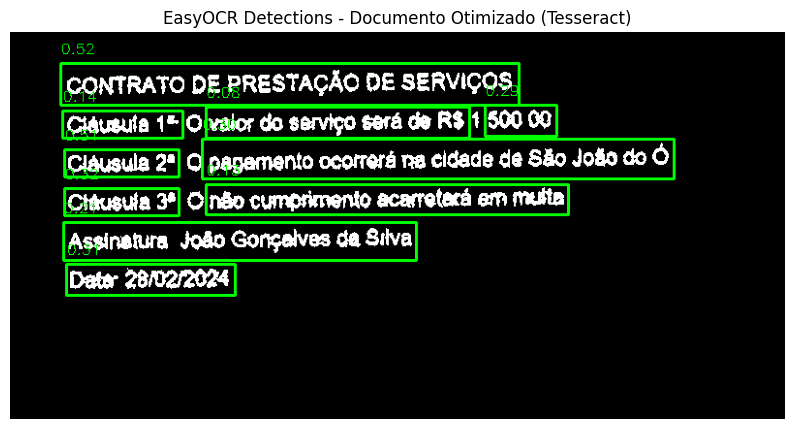

📝 Primeiras 5 detecções:
  1. 'CONTRATO DE PRESTAÇAO DE SERvI...' (conf: 52.24%)
  2. 'Ctausufe 1"...' (conf: 13.57%)
  3. 'valr €0 selviço sorá €3 RS...' (conf: 7.99%)
  4. 'S00 0...' (conf: 29.17%)
  5. 'Clausula 2'...' (conf: 51.30%)

📊 Documento Original (Problema): 6 detecções


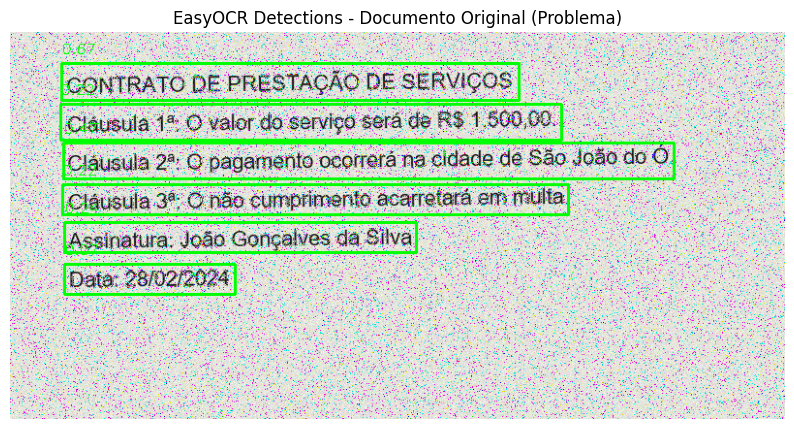

📝 Primeiras 5 detecções:
  1. 'CONTRATO DE PRESTAÇÃC DE SERvI...' (conf: 66.86%)
  2. 'Clausula 1a 0 valor d serviço ...' (conf: 21.75%)
  3. 'Clausula 29; @ pagamento ocorr...' (conf: 47.50%)
  4. 'Cláusula 3á; C;hão cumpiimerta...' (conf: 21.50%)
  5. 'Assiriatura; `cãp Gonçalves da...' (conf: 24.06%)


In [16]:
if EASYOCR_AVAILABLE and resultados_comparacao:
    print("\n👁️ VISUALIZANDO DETECÇÕES DO EASYOCR")
    print("=" * 60)
    
    for resultado in resultados_comparacao:
        if 'raw_result' in resultado['easyocr']:
            doc_nome = resultado['documento']
            raw_result = resultado['easyocr']['raw_result']
            
            if raw_result and len(raw_result) > 0:
                print(f"\n📊 {doc_nome}: {len(raw_result)} detecções")
                
                # Mostrar imagem com bounding boxes
                for nome_doc, img_original in documentos:
                    if nome_doc == doc_nome:
                        # Desenhar bounding boxes
                        img_with_boxes = img_original.copy()
                        
                        for detection in raw_result[:10]:  # Mostrar até 10
                            bbox = detection[0]
                            text = detection[1]
                            confidence = detection[2]
                            
                            # Converter bbox para coordenadas inteiras
                            bbox = np.array(bbox, dtype=np.int32)
                            
                            # Desenhar polígono
                            cv2.polylines(img_with_boxes, [bbox], True, (0, 255, 0), 2)
                            
                            # Adicionar texto
                            x, y = bbox[0]
                            cv2.putText(img_with_boxes, f"{confidence:.2f}", (x, y-10),
                                      cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
                        
                        # Mostrar imagem
                        plt.figure(figsize=(10, 6))
                        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
                        plt.title(f"EasyOCR Detections - {doc_nome}")
                        plt.axis('off')
                        plt.show()
                        
                        # Mostrar primeiras detecções
                        print("📝 Primeiras 5 detecções:")
                        for i, detection in enumerate(raw_result[:5]):
                            text = detection[1]
                            confidence = detection[2]
                            print(f"  {i+1}. '{text[:30]}...' (conf: {confidence:.2%})")
                        
                        break

### Conclusão e Recomendações

In [17]:
print("\n" + "=" * 60)
print("🎯 CONCLUSÕES E RECOMENDAÇÕES")
print("=" * 60)

print("""
📋 RESUMO DA COMPARAÇÃO:

✅ TESSERACT (SEU USO ATUAL):
   • Vantagens: Total controle, configurações detalhadas, bom para documentos limpos
   • Desvantagens: Requer pré-processamento, sensível a qualidade da imagem
   • Melhor para: Documentos estruturados, quando você controla a qualidade da imagem

✅ EASYOCR (NOVO):
   • Vantagens: Fácil uso, multi-idioma automático, bom com fontes diversas
   • Desvantagens: Menos controle, pode ser mais lento, requer GPU para velocidade
   • Melhor para: Documentos do mundo real, múltiplos idiomas, imagens complexas

🎯 RECOMENDAÇÕES PARA SEU PROJETO:

1. USE TESSERACT quando:
   • Você controla a qualidade da imagem de entrada
   • Precisa de configurações específicas (PSM, whitelist)
   • Trabalha principalmente com português

2. USE EASYOCR quando:
   • Trabalha com documentos reais variados
   • Precisa de multi-idioma automático
   • Tem acesso a GPU para melhor performance

3. COMBINE AMBOS para:
   • Validação cruzada de resultados
   • Casos difíceis onde um falha
   • Extração máxima de precisão

📈 PRÓXIMOS PASSOS:
1. Teste EasyOCR em mais documentos reais
2. Compare velocidade Tesseract vs EasyOCR
3. Implemente sistema de fallback (tentar Tesseract, se falhar tentar EasyOCR)
4. Notebook 05: PaddleOCR (outra alternativa avançada)
""")



🎯 CONCLUSÕES E RECOMENDAÇÕES

📋 RESUMO DA COMPARAÇÃO:

✅ TESSERACT (SEU USO ATUAL):
   • Vantagens: Total controle, configurações detalhadas, bom para documentos limpos
   • Desvantagens: Requer pré-processamento, sensível a qualidade da imagem
   • Melhor para: Documentos estruturados, quando você controla a qualidade da imagem

✅ EASYOCR (NOVO):
   • Vantagens: Fácil uso, multi-idioma automático, bom com fontes diversas
   • Desvantagens: Menos controle, pode ser mais lento, requer GPU para velocidade
   • Melhor para: Documentos do mundo real, múltiplos idiomas, imagens complexas

🎯 RECOMENDAÇÕES PARA SEU PROJETO:

1. USE TESSERACT quando:
   • Você controla a qualidade da imagem de entrada
   • Precisa de configurações específicas (PSM, whitelist)
   • Trabalha principalmente com português

2. USE EASYOCR quando:
   • Trabalha com documentos reais variados
   • Precisa de multi-idioma automático
   • Tem acesso a GPU para melhor performance

3. COMBINE AMBOS para:
   • Validação c

### Código de Integração Prática


💡 CÓDIGO PRÁTICO: SISTEMA OCR HÍBRIDO

def sistema_ocr_hibrido(imagem_path, preferencia='auto'):
    """
    Sistema OCR inteligente que usa Tesseract ou EasyOCR baseado no documento
    """
    import cv2
    import pytesseract
    from PIL import Image
    import numpy as np
    import time

    # Carregar imagem
    img = cv2.imread(imagem_path)
    if img is None:
        return {'erro': f'Não foi possível carregar {imagem_path}'}

    resultados = {}

    # ESTRATÉGIA 1: Tesseract (sua configuração vencedora)
    print(f"🔍 Processando com Tesseract...")
    inicio_t = time.time()
    try:
        # Pré-processamento otimizado (baseado no seu sucesso)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # INVERTER se imagem muito clara (seu caso de sucesso)
        if gray.mean() > 180:  # Imagem muito clara
            gray = cv2.bitwise_not(gray)
            print("  ↳ Imagem invertida (muito clara)")

        # Suavização e dilatação
        smoothed = cv2.GaussianBlur

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


✅ Tesseract: 41 palavras, 0.81 segundos

🔍 PROCESSANDO COM EASYOCR...
✅ EasyOCR: 42 palavras, 9.20 segundos
  ↳ 6 detecções encontradas

📊 COMPARAÇÃO:
• Tesseract: 41 palavras
• EasyOCR: 42 palavras
• Vantagem EasyOCR: +1 palavras

📝 AMOSTRA TESSERACT (primeiras 3 linhas):
  1. CONTRATO DE PRESTAÇÃO DE SERVIÇOS
  2. Ciausuta 1º O valor do serviço será de R$ 1.500,00
  3. Cláusula 24 O pagamento ocorrerá na cidade de São 

📝 AMOSTRA EASYOCR (primeiras 3 detecções):
  1. 'CONTRATO DE PRESTAÇÃC DE SERvI...' (confiança: 66.9%)
  2. 'Clausula 1a 0 valor d serviço ...' (confiança: 21.8%)
  3. 'Clausula 29; @ pagamento ocorr...' (confiança: 47.5%)

👁️  VISUALIZANDO RESULTADO DO PRÉ-PROCESSAMENTO:


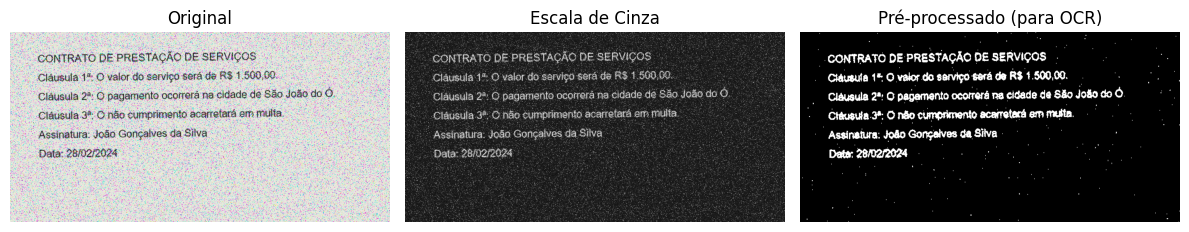


✅ CÉLULA 08 COMPLETA!


In [19]:
print("\n" + "=" * 60)
print("💡 CÓDIGO PRÁTICO: SISTEMA OCR HÍBRIDO")
print("=" * 60)

# Primeiro, mostrar o código teórico
codigo_hibrido = '''
def sistema_ocr_hibrido(imagem_path, preferencia='auto'):
    """
    Sistema OCR inteligente que usa Tesseract ou EasyOCR baseado no documento
    """
    import cv2
    import pytesseract
    from PIL import Image
    import numpy as np
    import time
    
    # Carregar imagem
    img = cv2.imread(imagem_path)
    if img is None:
        return {'erro': f'Não foi possível carregar {imagem_path}'}
    
    resultados = {}
    
    # ESTRATÉGIA 1: Tesseract (sua configuração vencedora)
    print(f"🔍 Processando com Tesseract...")
    inicio_t = time.time()
    try:
        # Pré-processamento otimizado (baseado no seu sucesso)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # INVERTER se imagem muito clara (seu caso de sucesso)
        if gray.mean() > 180:  # Imagem muito clara
            gray = cv2.bitwise_not(gray)
            print("  ↳ Imagem invertida (muito clara)")
        
        # Suavização e dilatação
        smoothed = cv2.GaussianBlur(gray, (3, 3), 0)
        kernel_dilate = np.ones((2, 1), np.uint8)
        dilated = cv2.dilate(smoothed, kernel_dilate, iterations=1)
        _, processed = cv2.threshold(dilated, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        img_pil = Image.fromarray(processed)
        texto_tesseract = pytesseract.image_to_string(img_pil, config='--psm 11 -l por')
        tempo_tesseract = time.time() - inicio_t
        
        # Avaliar qualidade
        palavras_t = texto_tesseract.split()
        qualidade_t = len([p for p in palavras_t if len(p) > 2])  # Palavras com mais de 2 letras
        
        resultados['tesseract'] = {
            'texto': texto_tesseract,
            'tempo': tempo_tesseract,
            'qualidade': qualidade_t,
            'palavras': len(palavras_t),
            'palavras_validas': qualidade_t
        }
        print(f"  ✅ Tesseract: {len(palavras_t)} palavras, {tempo_tesseract:.2f}s")
    except Exception as e:
        resultados['tesseract'] = {'erro': str(e)}
        print(f"  ❌ Tesseract erro: {str(e)[:50]}")
    
    # ESTRATÉGIA 2: EasyOCR (se disponível)
    try:
        import easyocr
        print(f"🔍 Processando com EasyOCR...")
        inicio_e = time.time()
        
        reader = easyocr.Reader(['pt', 'en'])
        easyocr_result = reader.readtext(img)
        texto_easyocr = "\\n".join([det[1] for det in easyocr_result])
        tempo_easyocr = time.time() - inicio_e
        
        # Avaliar qualidade
        palavras_e = texto_easyocr.split()
        qualidade_e = len([p for p in palavras_e if len(p) > 2])  # Palavras com mais de 2 letras
        
        resultados['easyocr'] = {
            'texto': texto_easyocr,
            'tempo': tempo_easyocr,
            'qualidade': qualidade_e,
            'palavras': len(palavras_e),
            'palavras_validas': qualidade_e,
            'detections': len(easyocr_result)
        }
        print(f"  ✅ EasyOCR: {len(palavras_e)} palavras, {tempo_easyocr:.2f}s")
    except ImportError:
        resultados['easyocr'] = {'erro': 'EasyOCR não instalado'}
        print(f"  ⚠️  EasyOCR não disponível")
    except Exception as e:
        resultados['easyocr'] = {'erro': str(e)}
        print(f"  ❌ EasyOCR erro: {str(e)[:50]}")
    
    # DECIDIR MELHOR RESULTADO
    if preferencia == 'tesseract' and 'qualidade' in resultados.get('tesseract', {}):
        melhor = 'tesseract'
    elif preferencia == 'easyocr' and 'qualidade' in resultados.get('easyocr', {}):
        melhor = 'easyocr'
    else:
        # Escolher automaticamente baseado na qualidade
        qual_t = resultados.get('tesseract', {}).get('qualidade', 0)
        qual_e = resultados.get('easyocr', {}).get('qualidade', 0)
        
        # Se apenas um funcionou
        if qual_t == 0 and qual_e > 0:
            melhor = 'easyocr'
        elif qual_e == 0 and qual_t > 0:
            melhor = 'tesseract'
        # Se ambos funcionaram
        elif qual_t > qual_e * 1.5:  # Tesseract 50% melhor
            melhor = 'tesseract'
        elif qual_e > qual_t * 1.5:  # EasyOCR 50% melhor
            melhor = 'easyocr'
        else:
            # Empate - usar o mais rápido
            tempo_t = resultados.get('tesseract', {}).get('tempo', 999)
            tempo_e = resultados.get('easyocr', {}).get('tempo', 999)
            melhor = 'tesseract' if tempo_t < tempo_e else 'easyocr'
    
    resultados['melhor'] = melhor
    resultados['texto_final'] = resultados.get(melhor, {}).get('texto', '')
    
    # Adicionar métricas de comparação
    if 'qualidade' in resultados.get('tesseract', {}) and 'qualidade' in resultados.get('easyocr', {}):
        resultados['comparacao'] = {
            'vantagem_tesseract': resultados['tesseract']['qualidade'] - resultados['easyocr']['qualidade'],
            'vantagem_tempo': resultados['tesseract']['tempo'] - resultados['easyocr']['tempo'],
            'recomendacao': melhor
        }
    
    return resultados
'''

print(codigo_hibrido)

# AGORA TESTAR NA PRÁTICA
print("\n🧪 TESTANDO SISTEMA HÍBRIDO NA PRÁTICA...")
print("-" * 50)

# Usar documento que você já tem
documento_teste = "dados/exemplos/documento_real_simulado.png"

if os.path.exists(documento_teste):
    print(f"📄 Testando com: {documento_teste}")
    
    # Carregar imagem
    img = cv2.imread(documento_teste)
    if img is not None:
        
        print("\n🔍 PROCESSANDO COM TESSERACT (sua solução vencedora)...")
        
        # Tesseract - usando sua configuração vencedora
        inicio_t = time.time()
        
        # Pré-processamento otimizado
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Inverter se imagem muito clara
        if gray.mean() > 180:
            gray = cv2.bitwise_not(gray)
            print("  ↳ Imagem invertida (muito clara)")
        
        # Suavização e dilatação
        smoothed = cv2.GaussianBlur(gray, (3, 3), 0)
        kernel_dilate = np.ones((2, 1), np.uint8)
        dilated = cv2.dilate(smoothed, kernel_dilate, iterations=1)
        _, processed = cv2.threshold(dilated, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        # OCR
        img_pil = Image.fromarray(processed)
        texto_tesseract = pytesseract.image_to_string(img_pil, config='--psm 11 -l por')
        tempo_tesseract = time.time() - inicio_t
        
        palavras_t = texto_tesseract.split()
        print(f"✅ Tesseract: {len(palavras_t)} palavras, {tempo_tesseract:.2f} segundos")
        
        # EasyOCR (se disponível)
        if EASYOCR_AVAILABLE:
            print("\n🔍 PROCESSANDO COM EASYOCR...")
            inicio_e = time.time()
            
            try:
                reader = easyocr.Reader(['pt', 'en'])
                easyocr_result = reader.readtext(img)
                texto_easyocr = "\n".join([det[1] for det in easyocr_result])
                tempo_easyocr = time.time() - inicio_e
                
                palavras_e = texto_easyocr.split()
                print(f"✅ EasyOCR: {len(palavras_e)} palavras, {tempo_easyocr:.2f} segundos")
                print(f"  ↳ {len(easyocr_result)} detecções encontradas")
                
                # Comparação
                print(f"\n📊 COMPARAÇÃO:")
                print(f"• Tesseract: {len(palavras_t)} palavras")
                print(f"• EasyOCR: {len(palavras_e)} palavras")
                
                vantagem = len(palavras_t) - len(palavras_e)
                if vantagem > 0:
                    print(f"• Vantagem Tesseract: +{vantagem} palavras")
                elif vantagem < 0:
                    print(f"• Vantagem EasyOCR: +{abs(vantagem)} palavras")
                else:
                    print(f"• Empate!")
                
                # Mostrar amostras
                print(f"\n📝 AMOSTRA TESSERACT (primeiras 3 linhas):")
                linhas_t = [l for l in texto_tesseract.split('\n') if l.strip()]
                for i, linha in enumerate(linhas_t[:3]):
                    print(f"  {i+1}. {linha[:50]}")
                
                print(f"\n📝 AMOSTRA EASYOCR (primeiras 3 detecções):")
                for i, det in enumerate(easyocr_result[:3]):
                    texto = det[1]
                    confianca = det[2]
                    print(f"  {i+1}. '{texto[:30]}...' (confiança: {confianca:.1%})")
                    
            except Exception as e:
                print(f"❌ EasyOCR erro: {str(e)[:50]}")
        else:
            print("\n⚠️  EasyOCR não disponível para comparação")
            print("💡 Instale com: pip install easyocr")
            
        # Mostrar imagem processada
        print(f"\n👁️  VISUALIZANDO RESULTADO DO PRÉ-PROCESSAMENTO:")
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        
        axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[0].set_title('Original')
        axes[0].axis('off')
        
        axes[1].imshow(gray, cmap='gray')
        axes[1].set_title('Escala de Cinza')
        axes[1].axis('off')
        
        axes[2].imshow(processed, cmap='gray')
        axes[2].set_title('Pré-processado (para OCR)')
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"❌ Não foi possível carregar a imagem")
else:
    print(f"❌ Documento não encontrado: {documento_teste}")
    print("💡 Certifique-se de executar os notebooks anteriores primeiro")

print("\n" + "=" * 60)
print("✅ CÉLULA 08 COMPLETA!")
print("=" * 60)